# Training the ConvNet to Recognize Doritos and Mountain Dew

#### Importing libraries

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('C:/Users/Nicolas/Documents/Scraping/doritos_mountaindew/cropped_final')
import PIL 
from PIL import Image, ImageOps
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,\
    Dropout, Flatten
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

#### Importing the images

In [2]:
dew = glob('mountaindew/*png')

#### Appending the images

In [3]:
images = []

Appending the Mountain Dew images

In [4]:
for image in dew:
    if plt.imread(image).shape == (200, 200, 3):
        images.append(plt.imread(image))

In [5]:
len(images)

43

In [6]:
print(f'We have {len(images)} images of mountain dew.')

We have 43 images of mountain dew.


Appending the Doritos images

In [7]:
chips = glob('doritos/*png')

In [8]:
for image in chips:
    if plt.imread(image).shape == (200, 200, 3):
        images.append(plt.imread(image))

In [9]:
images = np.array(images, dtype=np.float32)

In [10]:
print(f'We have {len(images)} images in total.')

We have 88 images in total.


#### Making the target array

In [11]:
labels = ['Mountain Dew', 'Doritos']

In [12]:
y = np.hstack([[0 for i in range(43)], [1 for i in range(45)]])

In [13]:
y = to_categorical(y, 2).astype(np.float32)

#### Splitting the data in train and test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, shuffle=True)

#### Building the ConvNet

In [15]:
input_shape = (200, 200, 3)

Model

In [40]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dense(128, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(2, activation='sigmoid')
    ])

Callbacks

In [41]:
callbacks = [ModelCheckpoint('doritos_dew_weights.h5', monitor='val_acc', save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

Compiling

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Training

In [43]:
_ =      model.fit(X_train, y_train,
         epochs=20,
         validation_data=[X_test, y_test],
         batch_size=4,
         callbacks=callbacks)

Train on 70 samples, validate on 18 samples
Epoch 1/20
70/70 [==============================] - 10s 141ms/sample - loss: 1.7259 - acc: 0.8000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 2/20
70/70 [==============================] - 3s 45ms/sample - loss: 0.0432 - acc: 0.9929 - val_loss: 1.0748e-04 - val_acc: 1.0000
Epoch 3/20
70/70 [==============================] - 3s 44ms/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 4/20
70/70 [==============================] - 3s 45ms/sample - loss: 3.1541e-04 - acc: 1.0000 - val_loss: 2.9376e-04 - val_acc: 1.0000
Epoch 5/20
70/70 [==============================] - 3s 45ms/sample - loss: 3.0980e-05 - acc: 1.0000 - val_loss: 7.7672e-05 - val_acc: 1.0000
Epoch 6/20
70/70 [==============================] - 3s 45ms/sample - loss: 1.4685e-05 - acc: 1.0000 - val_loss: 4.3032e-05 - val_acc: 1.0000
Epoch 7/20
70/70 [==============================] - 3s 45ms/sample - loss: 1.1109e-05 - acc: 1.0000 - val_loss: 3.2176e-05 - val

Loading weights of the saved model

In [44]:
model = load_model('doritos_dew_weights.h5')

#### Functions

In [45]:
def crop(img):
    if img.shape[0]<img.shape[1]: # it means horizontal photo
        x = img.shape[0]
        y = img.shape[1]
        crop_img = img[: , int(y/2-x/2):int(y/2+x/2)]
    else:
        x = img.shape[1]
        y = img.shape[0]
        crop_img = img[int(y/2-x/2):int(y/2+x/2) , :]

    return crop_img

In [46]:
def resize(img):
    return Image.fromarray(img).resize((200, 200))

In [50]:
def preprocess_predict(image):
    a = plt.imread(image)
    b = crop(a)
    c = Image.fromarray(b)
    d = c.resize((200, 200))
    e = np.array(d)
    image = e.reshape(1, 200, 200, 3)
    y_hat = model.predict_proba(image)#[0]#.astype(int)
    #prediction = labels[y_hat]
    #prediction = labels[np.where(y_hat == 1)[0][0]]
    
    return y_hat #prediction, image

#### Making a prediction for a test image

Mountain Dew

In [51]:
y_pred = preprocess_predict('../mtndew_test.jpg') #, image

In [52]:
y_pred

array([[1., 0.]], dtype=float32)

In [53]:
pic = plt.imshow(image.reshape(input_shape))

AttributeError: 'str' object has no attribute 'reshape'

Doritos

In [54]:
y_pred = preprocess_predict('../doritos_test.jpg') # , image

In [55]:
y_pred

array([[0., 1.]], dtype=float32)

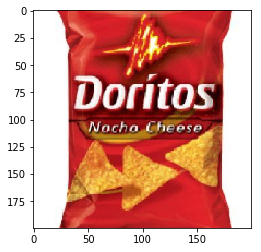

In [78]:
pic = plt.imshow(image.reshape(input_shape))